In [1]:
import sys 
print(sys.executable)

c:\Program Files\Python310\python.exe


In [1]:
import gwy


ModuleNotFoundError: No module named 'gwy'

In [17]:
import numpy as np
def find_first_zero(xpos: np.ndarray)->int:
	"""
	Finds the index of the first zero in an array of x positions.

	Parameters:
	- xpos (np.ndarray): An array of x positions.

	Returns:
	- int: The index of the first zero in the array.
	"""
	return np.where(xpos == 0)[0][0]

def find_last_zero(xpos: np.ndarray)->int:
	"""
	Finds the index of the last zero in an array of x positions.

	Parameters:
	- xpos (np.ndarray): An array of x positions.

	Returns:
	- int: The index of the last zero in the array.
	"""
	return np.where(xpos == 0)[0][-1]


x=np.array([1,2,3,0,4,5,0,6,7,8])
print(find_first_zero(x))
print(find_last_zero(x))
print(x[3:-2])

3
6
[0 4 5 0 6]


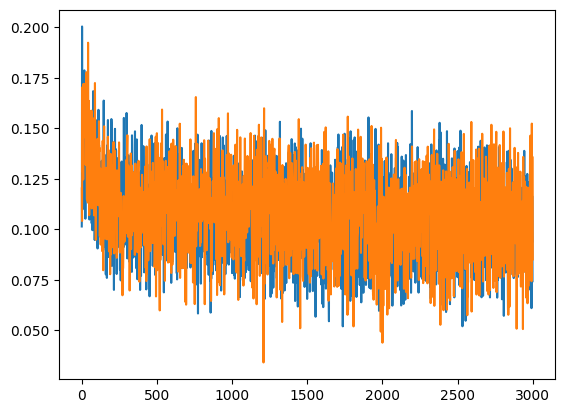

In [19]:
import matplotlib.pyplot as plt
data1 = np.genfromtxt('Tribometer_data\DATA\OA-10_10N_100mms_test4_May8_reported_CoF.csv', delimiter=',', skip_header=1)
data2 = np.genfromtxt('datos2.txt', delimiter=',')
plt.plot(data1)
plt.plot(np.linspace(0,len(data1),len(data2)),data2)
